<a href="https://colab.research.google.com/github/SerhiiBahdas/ElectronsBehaviour/blob/master/AlzNet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Open file with data in reading mode
from google.colab import drive
data = h5py.File('/content/gdrive/My Drive/diploma/dataset_stripped_88.h5', 'r')

In [4]:
# List all groups
print("Keys: %s" % data.keys())

key_for_features = list(data.keys())[0]
key_for_labels = list(data.keys())[1]

# Get the data
data_x = np.array(data[key_for_features])
data_labels = np.array(data[key_for_labels])

Keys: KeysView(<HDF5 file "dataset_stripped_88.h5" (mode r)>)


In [5]:
#let's find out data shape
print('Features shape: ', data_x.shape)
print('Labels shape: ', data_labels.shape)

Features shape:  (673, 89, 88, 88, 1)
Labels shape:  (673, 3)


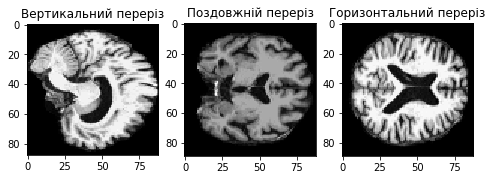

In [6]:
#let's visualize some data examples
data_for_show1 = data_x.reshape(673,89,88,88)
plt.figure(figsize = [8,8])
plt.subplot(1,3,1)
plt.imshow(data_for_show1[0,50,:,:], cmap = 'gray')
plt.title('Вертикальний переріз')

plt.subplot(1,3,2)
plt.imshow(data_for_show1[0,:,50,:], cmap = 'gray')
plt.title('Поздовжній переріз')

plt.subplot(1,3,3)
plt.imshow(data_for_show1[0,:,:,50], cmap = 'gray')
plt.title('Горизонтальний переріз')
plt.show()

In [0]:
#let's divide dataset on 3 2d images datasets - vertical_section, horizontal_section, transverse_seсtion 
vertical_section_x = list()
vertical_section_y = list()

horizontal_section_x = list()
horizontal_section_y = list()

transverse_section_x = list()
transverse_section_y = list()

for i in range(673):
    for j in range(35,65):
    #j = 40
    #We take all samples from 0 to 88 to make all the images the same size.
        vertical_section_x.append(data_x[i,j,0:88,0:88])
        vertical_section_y.append(data_labels[i,:])
        
        horizontal_section_x.append(data_x[i,0:88,j,0:88])
        horizontal_section_y.append(data_labels[i,:])
        
        transverse_section_x.append(data_x[i,0:88,0:88,j])
        transverse_section_y.append(data_labels[i,:])

#from sklearn.utils import shuffle

vertical_section_x = np.array(vertical_section_x)
vertical_section_y = np.array(vertical_section_y)
#vertical_section_x,vertical_section_y = shuffle(vertical_section_x, vertical_section_y)

horizontal_section_x = np.array(horizontal_section_x)
horizontal_section_y = np.array(horizontal_section_y)
#horizontal_section_x,horizontal_section_y = shuffle(horizontal_section_x,horizontal_section_y)

transverse_section_x = np.array(transverse_section_x)
transverse_section_y = np.array(transverse_section_y)
#transverse_section_x,transverse_section_y = shuffle(transverse_section_x,transverse_section_y)

In [0]:
#just to make 2D dataset
data2D_x = (vertical_section_x + horizontal_section_x + transverse_section_x)
data2D_labels = (vertical_section_y + horizontal_section_y + transverse_section_y)

In [9]:
#let's find out data shape
print('Features shape: ', data2D_x.shape)
print('Labels shape: ', data2D_labels.shape)

Features shape:  (20190, 88, 88, 1)
Labels shape:  (20190, 3)


In [10]:
#let's now split the data into training, test and validation sets
from sklearn.model_selection import train_test_split
train_x, test_x, train_labels, test_labels = train_test_split(data2D_x, data2D_labels, test_size=0.25, shuffle= True)
train_x, valid_x, train_labels, valid_labels = train_test_split(train_x, train_labels, test_size=0.25, shuffle= True)

print(train_x.shape, train_labels.shape)
print(test_x.shape, test_labels.shape)
print(valid_x.shape, valid_labels.shape)

(11356, 88, 88, 1) (11356, 3)
(5048, 88, 88, 1) (5048, 3)
(3786, 88, 88, 1) (3786, 3)


In [0]:
#data preprocessing
#train_x = train_x.astype('float32')
#test_x = test_x.astype('float32')
#valid_x = valid_x.astype('float32')

#train_x = train_x/255
#test_x = test_x/255
#valid_x = valid_x/255

**The identity block is the standard block used in ResNets, and corresponds to the case where the input activation (say $a^{[l]}$) has the same dimension as the output activation (say $a^{[l+2]}$). To flesh out the different steps of what happens in a ResNet's identity block, here is an alternative diagram showing the individual steps (here is an illustration):** https://www.google.com/search?client=firefox-b-d&biw=1287&bih=802&tbm=isch&sa=1&ei=VOznXKXtEY2gjgb2qJC4Bg&q=identity+block+cnn&oq=identity+block+cnn&gs_l=img.3...2956.4236..4475...0.0..0.155.462.1j3......0....1..gws-wiz-img.......0i19.x0aij8zxNSg#imgrc=YsFhy8-uwGENxM:

In [0]:
def identity_block(X, f, filters, stage, block):
    """
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = keras.layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer =  keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = keras.layers.Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = keras.layers.Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer =  keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = keras.layers.Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = keras.layers.Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer =  keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = keras.layers.Add()([X, X_shortcut])
    X = keras.layers.Activation('relu')(X)
    
    return X

**The ResNet "convolutional block" is the other type of block. We can use this type of block when the input and output dimensions don't match up. The difference with the identity block is that there is a CONV2D layer in the shortcut path (here is an illustration)**: https://www.google.com/search?client=firefox-b-d&biw=1287&bih=802&tbm=isch&sa=1&ei=a-znXLfWNJCqrgSP77H4Dw&q=convolutional+block+cnn+coursera&oq=convolutional+block+cnn+coursera&gs_l=img.3...125161.128927..129169...1.0..0.126.1472.5j9......0....1..gws-wiz-img.LxFy8b6NzvQ#imgrc=Z8VKiqeg3r9VUM:

In [0]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = keras.layers.Conv2D(F1, (1, 1), strides = (s,s),  padding = 'valid', name = conv_name_base + '2a',  kernel_initializer = keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = keras.layers.Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = keras.layers.Conv2D(F2, (f, f), strides = (1,1), padding = 'same',  name = conv_name_base + '2b',  kernel_initializer = keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = keras.layers.Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = keras.layers.Conv2D(F3, (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = keras.layers.Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = keras.initializers.glorot_uniform())(X_shortcut)
    X_shortcut = keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = keras.layers.Add()([X, X_shortcut])
    X = keras.layers.Activation('relu')(X)
    
    return X

**How did I build the following? Here is the tip**: https://www.google.com/search?q=res+net&client=firefox-b-d&source=lnms&tbm=isch&sa=X&ved=0ahUKEwj8oZiPobTiAhXhlYsKHWviC2AQ_AUIDigB&biw=1287&bih=802#imgrc=eLRQQc-BgrBkxM:

In [0]:
def ResNet152(input_shape = (64, 64, 3), classes = 6):
    """
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = keras.layers.Input(input_shape)

    
    # Zero-Padding
    X = keras.layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = keras.layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = keras.initializers.glorot_uniform())(X)
    X = keras.layers.BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128,128,512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128,128,512], stage=3, block='b')
    X = identity_block(X, 3, [128,128,512], stage=3, block='c')
    X = identity_block(X, 3, [128,128,512], stage=3, block='d')
    X = identity_block(X, 3, [128,128,512], stage=3, block='e')
    X = identity_block(X, 3, [128,128,512], stage=3, block='f')
    X = identity_block(X, 3, [128,128,512], stage=3, block='g')
    X = identity_block(X, 3, [128,128,512], stage=3, block='h')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='g')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='h')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='i')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='j')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='k')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='l')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='m')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='n')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='o')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='p')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='q')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='r')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='s')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='t')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='u')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='v')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='w')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='x')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='y')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='z')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='aa')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ab')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ac')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ad')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ae')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='af')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ag')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ah')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='ai')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='aj')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = keras.layers.AveragePooling2D()(X)

    # output layer
    X = keras.layers.Flatten()(X)
    #X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = keras.initializers.glorot_uniform())(X)
    
    
    # Create model
    model = keras.models.Model(inputs = X_input, outputs = X, name='ResNet152')

    return model

In [0]:
#building the model's graph
AlzNet = ResNet152(input_shape = (88, 88, 1), classes = 3)

In [0]:
# let's configure the learning process by compiling the model.
AlzNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#model parameters specification
batch_size = 50
epochs = 10

result = AlzNet.fit(train_x, train_labels,batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (valid_x,valid_labels))

Instructions for updating:
Use tf.cast instead.
Train on 11356 samples, validate on 3786 samples
Epoch 1/10
11356/11356 [==============================] - 135s 12ms/step - loss: 4.4182 - acc: 0.4585 - val_loss: 36.8979 - val_acc: 0.2369
Epoch 2/10
11356/11356 [==============================] - 94s 8ms/step - loss: 3.6394 - acc: 0.4780 - val_loss: 4.3503 - val_acc: 0.4733
Epoch 3/10
11356/11356 [==============================] - 94s 8ms/step - loss: 3.0766 - acc: 0.4809 - val_loss: 3.3968 - val_acc: 0.4773
Epoch 4/10
11356/11356 [==============================] - 94s 8ms/step - loss: 2.9579 - acc: 0.5014 - val_loss: 2.8593 - val_acc: 0.5116
Epoch 5/10
11356/11356 [==============================] - 94s 8ms/step - loss: 2.7370 - acc: 0.5403 - val_loss: 3.0693 - val_acc: 0.4583
Epoch 6/10
11356/11356 [==============================] - 94s 8ms/step - loss: 2.5246 - acc: 0.5789 - val_loss: 2.8584 - val_acc: 0.5549
Epoch 7/10
11356/11356 [==============================] - 94s 8ms/step - loss:

In [0]:
test_eval = AlzNet.evaluate(test_x,test_labels, verbose = 0)

In [19]:
print('Test loss:', test_eval[0])
print('Test acuracy:', test_eval[1])

Test loss: 3.3891023112174636
Test acuracy: 0.47543581621204806


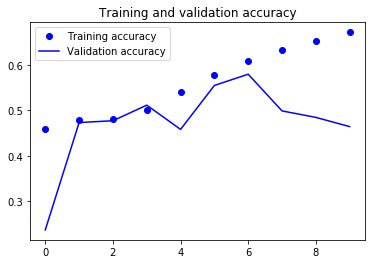

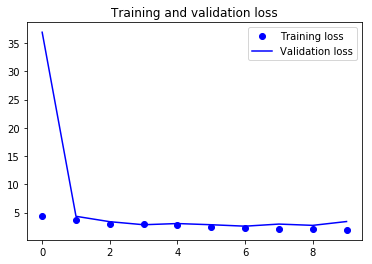

In [20]:
accuracy = result.history['acc']
val_accuracy = result.history['val_acc']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()